# Reproduces V1 F1 calculations

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("RibonanzaSupplementalTablesV1_Table_S8.csv",skiprows=2)[:78]
df

,name,dataset,sequence,structure,length,num_pseudoknots,RibonanzaNet PRED,RibonanzaNet no pretraining PRED,Vienna2 PRED,CONTRAfold2 PRED,...,CONTRAfold2 (HK) F1,Shapify-Hfold F1,SPOT-RNA F1,E-value,log E-value,TM score,RMSD (RibonanzaNet) ↓,RMSD (SPOT-RNA) ↓,lDDT (RibonanzaNet) ↑,lDDT (SPOT-RNA) ↑
0,6MXQ,pdb,GGCAGUAUAGUCCGAACUGCAACUUCGGUUCACCUUCUCUCUAACUGCC,((((((.(((...(((.((.(((....)))))..)))...))))))))),49.0,0.0,((((((.(((.(((((.......)))))............))))))))),((((((.....(((((.......)))))...............)))))),((((((.(((...((((((......)))))).........))))))))),((((((.(((.(((((.......)))))............))))))))),...,0.4444444444,0.9375,0.4285714286,1.000000e+00,0.000000,0.5783,17.8,19.6,0.408,0.365
1,6NOA,pdb,GGCAGUAUAGUCCGAACUGCAAAUCUUAUUUUCUUUUCACCUUCUC...,((((((.(((...(((.((.(((...........)))))..))).....,56.0,0.0,((((((.(((.......................................,((((((..............((.......))..................,((((((.(((...(((.((.(((...........)))))..))).....,((((((.(((...(((.((..((..........))..))..))).....,...,0.64,0.8235294118,0.6923076923,1.000000e+00,0.000000,0.5564,12.93,12.16,0.549,0.464
2,6PK9,pdb,GGAGGGUAGACUCGCUCUCC,(((((((......))))))),20.0,0.0,(((((((......))))))),(((((((......))))))),(((((((......))))))),(((((((......))))))),...,1,1,1,1.000000e+00,0.000000,0.6317,3.73,3.46,0.743,0.725
3,6TB7,pdb,GGCUUCAACAACCCCGUAGGUUGGGCCGAAAGGCAGCGAAUCUACU...,(((((((.....[[.((((((((.(((....))).])]))))))))...,52.0,2.0,(((((((........(((((((..(((....)))....))))))))...,(((((((.................(((....)))...........)...,(((((((........(((((((.((((....)))..).))))))))...,(((((((........(((((((.((((....)))..).))))))))...,...,0.9189189189,0.9189189189,0.8717948718,1.000000e+00,0.000000,0.4747,7.24,6.79,0.625,0.617
4,7D7W,pdb,GCUUCAACAACCCCGUAGGUGGGGACGAAAGUCAGCGCACCUACUG...,((((((.....[[.((((((((.(((....))).])])))))))))...,51.0,2.0,((((((........(((((((..(((....)))....)))))))))...,((((((.....((..[[[[[.))(((....))).....]]]]].))...,((((((........(((((((.((((....)))..).)))))))))...,((((((........(((((((.((((....)))..).)))))))))...,...,0.6896551724,0.9142857143,0.8421052632,1.000000e+00,0.000000,0.5015,10.15,7.18,0.519,0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,R1138v1,casp_15,GGGAGAGUACUAUUCAGAUGCAGACCGCAAGUUCAGAGCGGUUUGC...,((((((((((((((((((((((.(((((..[[[[[[.))))).)))...,720.0,5.0,((((((((((((((((((((((((((((.........)))))))))...,(((((((((((.....((((((((((((.........)))))))))...,((((((((((((((((((((((((((((.........)))))))))...,((((((((((((((((((((((((((((.........)))))))))...,...,0.8961937716,0.8677248677,0.8085106383,1.000000e+00,0.000000,0.1959,44.55,45.74,0.274,0.123
74,R1149,casp_15,GGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCG...,(((((..((...(((.(((((((((((..((((((.(((((........,124.0,0.0,(((((.......(((.(((((((((((..((((((..((((........,((((((((.....))).......................((........,(((((..((...(((.((((((((.....((((((.(((((........,(((((..((...(((.(((((((((((..((((((.(((((........,...,0.9,0.9397590361,0.7123287671,6.640000e-60,-59.177832,0.4025,12.73,18.92,0.651,0.52
75,R1156,casp_15,GGAGCAUCGUGUCUCAAGUGCUUCACGGUCACAAUAUACCGUUUCG...,(((((.((.((.(((..(((((((((((((((...((.(((........,135.0,0.0,(((((.((.((.(((..(((((((((.(((((......(((........,(((((.((..................((([[......))).........,(((((.((.((.(((..((((((.(((((........)))))..((...,(((((.((.((.(((..((((((....(((((......(((........,...,0.6,0.8,0.6329113924,5.660000e-66,-65.247184,0.3901,28.56,20.45,0.554,0.47
76,R1189,casp_15,GCGUACAGGGAACACGCAACCCCGAAGGAUCGGGGAAGGGACGUCG...,(((...........)))..(((((......)))))........((....,118.0,0.0,((((.........))))..((((((....)))))).......((((...,(((...........)))...((((......))))...............,((((.........))))..((((((....))))))...(((.((((...,((((.........))))..((((((....))))))...(((.((((...,...,0.7346938776,0.6984126984,0.6923076923,1.000000e+00,0.000000,0.2798,33.08,31.72,0.485,0.487


In [12]:
df.columns

Index(['name', 'dataset', 'sequence', 'structure', 'length', 'num_pseudoknots',
       'RibonanzaNet PRED', 'RibonanzaNet no pretraining PRED', 'Vienna2 PRED',
       'CONTRAfold2 PRED', 'EternaFold PRED', 'IPknot PRED', 'Knotty PRED',
       'Vienna2 (TK) PRED', 'Vienna2 (HK) PRED', 'EternaFold ThreshKnot PRED',
       'EternaFold (HK) PRED', 'CONTRAfold2 ThreshKnot PRED',
       'CONTRAfold2 (HK) PRED', 'Shapify-Hfold PRED', 'SPOT-RNA PRED',
       'RibonanzaNet F1', 'RibonanzaNet no pretraining F1', 'Vienna2 F1',
       'CONTRAfold2 F1', 'EternaFold F1', 'IPknot F1', 'Knotty F1',
       'Vienna2 (TK) F1', 'Vienna2 (HK) F1', 'EternaFold ThreshKnot F1',
       'EternaFold (HK) F1', 'CONTRAfold2 ThreshKnot F1',
       'CONTRAfold2 (HK) F1', 'Shapify-Hfold F1', 'SPOT-RNA F1', 'E-value',
       'log E-value', 'TM score', 'RMSD (RibonanzaNet) ↓', 'RMSD (SPOT-RNA) ↓',
       'lDDT (RibonanzaNet) ↑', 'lDDT (SPOT-RNA) ↑'],
      dtype='object')

In [24]:
df.columns[6:21]

Index(['RibonanzaNet PRED', 'RibonanzaNet no pretraining PRED', 'Vienna2 PRED',
       'CONTRAfold2 PRED', 'EternaFold PRED', 'IPknot PRED', 'Knotty PRED',
       'Vienna2 (TK) PRED', 'Vienna2 (HK) PRED', 'EternaFold ThreshKnot PRED',
       'EternaFold (HK) PRED', 'CONTRAfold2 ThreshKnot PRED',
       'CONTRAfold2 (HK) PRED', 'Shapify-Hfold PRED', 'SPOT-RNA PRED'],
      dtype='object')

In [52]:
from ast import literal_eval
from utils import *

def get_stats(df,col):

    F1s=[]
    crossed_pair_F1s=[]
    for true_db, predicted_db in zip(df['structure'],df[col]):
        #predicted_bp=dotbrackte2bp(predicted_bp)

        if predicted_db!=predicted_db: # for edge case of Shapify-Hfold PRED where there is an nan as pred
            F1s.append(0)
            crossed_pair_F1s.append(0)


        else:
            true_bp=dotbrackte2bp(true_db)
            predicted_bp=dotbrackte2bp(predicted_db)



            crossed_pairs,crossed_pairs_set=detect_crossed_pairs(true_bp)
            predicted_crossed_pairs,predicted_crossed_pairs_set=detect_crossed_pairs(predicted_bp)
            
            _,_,f1=calculate_f1_score_with_pseudoknots(true_bp, predicted_bp)
            F1s.append(f1)
            

            if len(crossed_pairs)>0:
                _,_,crossed_pair_f1=calculate_f1_score_with_pseudoknots(crossed_pairs, predicted_crossed_pairs)
                crossed_pair_F1s.append(crossed_pair_f1)
            elif len(crossed_pairs)==0 and len(predicted_crossed_pairs)>0:
                crossed_pair_F1s.append(0)
            else:
                crossed_pair_F1s.append(np.nan)
        

        

    F1s=np.array(F1s)
    crossed_pair_F1s=np.array(crossed_pair_F1s)

    # print(f"for {col}")
    # print('global F1 mean',np.mean(F1s))
    # print('global F1 median',np.median(F1s))
    # print('crossed pair F1 mean',np.nanmean(crossed_pair_F1s))
    # print('crossed pair F1 median',np.nanmedian(crossed_pair_F1s))

    return F1s, crossed_pair_F1s

In [36]:
for col in df.columns[6:21]:
    print(col)
    F1s, crossed_pair_F1s=get_stats(df,col)

    model_name=col[:-5]
    print((df[f'{model_name} F1'].values.astype('float32')-F1s).max())
    print((df[f'{model_name} F1'].values.astype('float32')-F1s).mean())

RibonanzaNet PRED
2.8430667375900498e-08
-2.304137301184648e-10
RibonanzaNet no pretraining PRED
2.861022940781055e-08
3.5524335752248395e-09
Vienna2 PRED
2.9370404663886518e-08
3.9590990884546384e-09
CONTRAfold2 PRED
2.8301486043602608e-08
1.9779268408311643e-09
EternaFold PRED
2.940495824610423e-08
2.515802223953164e-09
IPknot PRED
2.9382571486991083e-08
5.903069646343658e-09
Knotty PRED
2.7093020382729094e-08
4.392614378359939e-09
Vienna2 (TK) PRED
2.7093020493751396e-08
3.787247335541047e-09
Vienna2 (HK) PRED
2.7093020493751396e-08
3.358929142661984e-09
EternaFold ThreshKnot PRED
2.8610229629855155e-08
3.921437285647186e-09
EternaFold (HK) PRED
2.8899221682365805e-08
3.159776926576222e-09
CONTRAfold2 ThreshKnot PRED
2.7093020382729094e-08
5.159376905050924e-09
CONTRAfold2 (HK) PRED
2.7093020382729094e-08
2.295525842772196e-09
Shapify-Hfold PRED
1.0
0.02460152757650034
SPOT-RNA PRED
2.79776902756268e-08
3.604121535404604e-09


Shapify-Hfold F1 has some problems in V1, 6PK9 has structure string of wrong length, 6TB7 also has nan structure string, overall there are 2 mismatches in F1. All other predictions algorithms seem fine however. 

In [30]:
df['Shapify-Hfold PRED']

0     ((((((.[[[...[[[....[[[....]]]....]]]...]]]))))))
1     ((((((.[[[...[[[.[[.[[[..........]]].]]..]]].....
2     [[[[[[[........(((((((..[[[....]]]....)))))))]...
3                                                   NaN
4     [[[[[[........(((((((..[[[....]]]....)))))))]]...
                            ...                        
73    [[[[[[[[[[[[[[[.[[[[[[[[[[[[.........]]]]]]]]]...
74    [[[[[..[[...[[[.[[[[[[[[.....((((([..[[[[........
75    [[[[[.[[.[[.[[[..[[[[[.....[[[[[......[[[........
76    [[[[.........]]]]..((((([....])))))...[[[.[[[[...
77    [[[[.........]]]]..((((([....])))))...[[[.[[[[...
Name: Shapify-Hfold PRED, Length: 78, dtype: object

In [39]:
df['Shapify-Hfold F1']

0           0.9375
1     0.8235294118
2                1
3     0.9189189189
4     0.9142857143
          ...     
73    0.8677248677
74    0.9397590361
75             0.8
76    0.6984126984
77    0.7536231884
Name: Shapify-Hfold F1, Length: 78, dtype: object

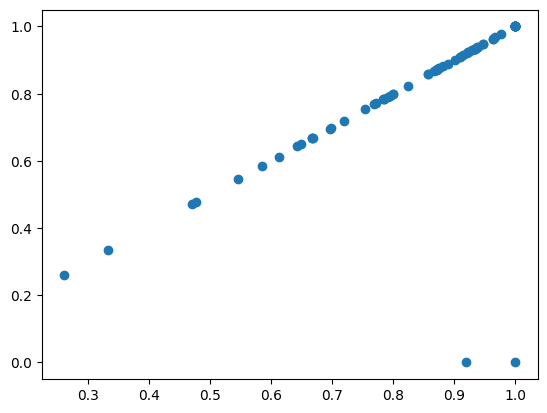

In [53]:
plt.scatter(df['Shapify-Hfold F1'].values.astype('float32'),get_stats(df,'Shapify-Hfold PRED')[0])

In [47]:
(df['Shapify-Hfold F1'].values.astype('float32')-get_stats(df,'Shapify-Hfold PRED')[0]).argmax()

2

In [49]:
get_stats(df,'Shapify-Hfold PRED')[0][2]

0.0

In [57]:
df.loc[2,'Shapify-Hfold PRED']

'[[[[[[[........(((((((..[[[....]]]....)))))))]]]]]]]'

In [58]:
df.loc[2,'structure']

'(((((((......)))))))'

In [59]:
df.loc[2,'RibonanzaNet PRED']

'(((((((......)))))))'

In [62]:
df.loc[3,'sequence']

'GGCUUCAACAACCCCGUAGGUUGGGCCGAAAGGCAGCGAAUCUACUGGAGCC'